In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn import covariance
import networkx as nx
from exchange.ftx.client import FtxClient

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

client = FtxClient()


In [89]:
minimum_date = datetime.fromisoformat('2022-05-01 00:00:00+00:00')
maximum_date = datetime.fromisoformat('2022-06-01 00:00:00+00:00')
minimum_volume = 1000000
resolution = '5m'
futures = client.get_futures()
perps = []
for future in futures:
    if 'PERP' in future['name'] and future['volumeUsd24h'] > minimum_volume:
        perps.append(future['name'])

#perps = ['BTC-PERP', 'ETH-PERP', 'SOL-PERP', 'AVAX-PERP', 'MATIC-PERP', 'XRP-PERP', 'BNB-PERP', 'AAVE-PERP', 'ADA-PERP', 'LINK-PERP', 'DOT-PERP', 'FTT-PERP', 'DOGE-PERP', 'SAND-PERP', 'LTC-PERP', 'TRX-PERP', 'BCH-PERP', 'AXS-PERP', 'EOS-PERP', 'SNX-PERP', 'SUSHI-PERP', 'ETC-PERP', 'ALT-PERP', 'SHIT-PERP', 'DEFI-PERP', 'ZEC-PERP', 'XMR-PERP', 'PRIV-PERP']
#perps = ['ZEC-PERP', 'XMR-PERP']

ohlc = {}
prices = {}
for perp in perps:
    data = []
    try:
        data = pd.read_parquet('C:/Users/Walid/Desktop/Workspace/data/{}_{}.parquet.gzip'.format(perp, resolution))
    except:
        print('Cannot find {} data'.format(perp))
    
    if len(data) > 0:
        data['startTime'] = data['startTime'].apply(lambda x: datetime.fromisoformat(x))
        ohlc[perp] = data.set_index('startTime')
        prices[perp] = ohlc[perp]['close']

prices_df = pd.DataFrame(prices)[minimum_date:maximum_date].T.dropna().T
prices_df

Cannot find ICP-PERP data
Cannot find RSR-PERP data
Cannot find RUNE-PERP data
Cannot find THETA-PERP data


,1INCH-PERP,AAVE-PERP,ADA-PERP,AGLD-PERP,ALGO-PERP,ALICE-PERP,ALT-PERP,ANC-PERP,APE-PERP,AR-PERP,...,XEM-PERP,XLM-PERP,XMR-PERP,XRP-PERP,XTZ-PERP,YFI-PERP,YFII-PERP,ZEC-PERP,ZIL-PERP,ZRX-PERP
startTime,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:00:00+00:00,1.1218,143.28,0.759470,0.9045,0.5718,4.9625,2990.90,1.60225,19.8220,23.016,...,0.08845,0.169675,214.56,0.586700,2.5437,16715.0,1556.00,114.51,0.07231,0.75100
2022-05-01 00:05:00+00:00,1.1218,143.13,0.760810,0.9015,0.5714,4.9875,2994.25,1.60375,19.8305,22.976,...,0.08855,0.170000,214.74,0.587450,2.5432,16720.0,1561.25,114.61,0.07224,0.75225
2022-05-01 00:10:00+00:00,1.1193,142.13,0.761150,0.8970,0.5712,4.9650,2991.35,1.60150,19.4380,22.925,...,0.08850,0.171300,213.44,0.584200,2.5387,16685.0,1556.50,114.02,0.07163,0.74250
2022-05-01 00:15:00+00:00,1.1154,141.81,0.760365,0.8975,0.5736,4.9650,2993.15,1.60100,19.1500,22.931,...,0.08855,0.171250,211.95,0.586375,2.5374,16690.0,1554.75,113.70,0.07141,0.73325
2022-05-01 00:20:00+00:00,1.1078,141.37,0.759085,0.8930,0.5721,4.9275,2990.40,1.59325,18.8205,22.890,...,0.08840,0.170625,212.00,0.585200,2.5296,16680.0,1545.75,113.00,0.07065,0.72675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 23:40:00+00:00,0.9672,114.02,0.628980,0.5805,0.4128,3.1450,2365.40,0.22600,6.8050,15.371,...,0.05340,0.150550,200.31,0.423200,2.1075,8080.0,533.25,93.65,0.05505,0.42050
2022-05-31 23:45:00+00:00,0.9670,113.81,0.630115,0.5805,0.4136,3.1525,2367.45,0.22550,6.8075,15.394,...,0.05340,0.150775,200.35,0.423900,2.1058,8100.0,533.50,93.88,0.05494,0.42075
2022-05-31 23:50:00+00:00,0.9631,113.10,0.624190,0.5785,0.4103,3.1325,2356.85,0.22575,6.7675,15.270,...,0.05320,0.150225,199.61,0.422000,2.0858,8035.0,531.00,93.24,0.05475,0.41950


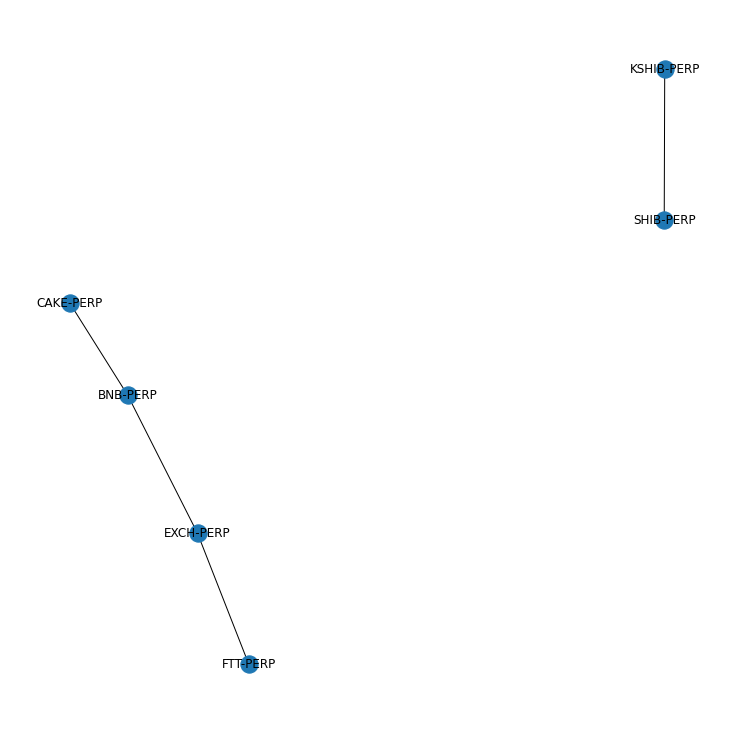

In [90]:
log_returns = np.log1p(prices_df.pct_change())[1:]

edge_model = covariance.GraphicalLassoCV(cv=40)
log_returns /= log_returns.std(axis=0)
edge_model.fit(log_returns)
p = edge_model.precision_

#prepare the matrix for network illustration
p = pd.DataFrame(p, columns=prices_df.columns, index=prices_df.columns)
links = p.stack().reset_index()
links.columns = ['var1', 'var2','value']
links=links.loc[ (abs(links['value']) > 0.17) &  (links['var1'] != links['var2']) ]
#build the graph using networkx lib
G=nx.from_pandas_edgelist(links,'var1','var2', create_using=nx.Graph())
pos = nx.spring_layout(G, k=0.2*1/np.sqrt(len(G.nodes())), iterations=20)
plt.figure(3, figsize=(10, 10))
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

In [12]:
nx.write_gexf(G, 'graph2.gexf')